In [3]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats
import matplotlib.pyplot as plt

## Задача

Для бета-распределения с параметрами 1 и 0.1, найти n, для которого распределение средних значений выборок будет похоже на нормальное.

(array([  4.,  10.,  18.,  62., 131., 241., 264., 161.,  82.,  27.]),
 array([0.83114874, 0.84391657, 0.85668439, 0.86945222, 0.88222005,
        0.89498788, 0.90775571, 0.92052354, 0.93329136, 0.94605919,
        0.95882702]),
 <BarContainer object of 10 artists>)

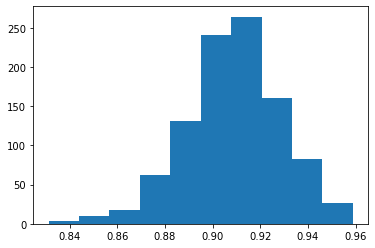

In [4]:
n = 100
means = np.random.beta(1, 0.1, size=(1000, n)).mean(axis=1)
plt.hist(means)


## Задача 

Человечество изобрело лекарство от рака! Клинические тесты показали, что оно действует с уровнем значимости 0.05, но у лекарства очень плохие побочные эффекты. 

Первая партия лекарства составила 50 млн ампул.

Сколько людей можно было бы спасти, если бы проводимый тест был с уровнем значимости 0.01?

In [5]:
n = 50000000
u = 0.05
better_u = 0.01

(u - better_u) * n

2000000.0

## Задача

Реализовать функцию для подсчета одновыборочного t-критерия Стьюдента

## $T = \frac{a - a_0}{\sigma / \sqrt{df}}$

$df$ - количество степеней свободы и равно $n - 1$

In [6]:
def t_stat(sample_mean, a0, std, df):
    return (sample_mean - a0) / (std / sqrt(df))

## Задача

Сгенерировать две выборки роста людей с одинаковыми дисперсиями и разными матожиданиями (из нормального распределения). 

Опровергнуть гипотезу $H_0$ о том, что матожидания этих распределений равны.

Для решения можно использовать `scipy.stats.ttest_ind`.

Важно: тест работает только для распределений с равными дисперсиями. Можно поставить разные дисперсии и одинаковые матожидания и посмотреть на результаты.

In [7]:
mean1 = 170
mean2 = 175
std = 10
sample1 = np.random.normal(mean1, std, size=100)
sample2 = np.random.normal(mean2, std, size=100)

scipy.stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-3.3568230906426253, pvalue=0.0009452879545644771)

Тест с двусторонней альтернативой, pvalue < 0.05, значит матожидания не равны.

Если бы изначально формулировали гипотезу о том, что матожидание первого распределения меньше, чем матожидание второго распределения, то могли бы доказать и это.

## Задача

Взять данные о погоде (data/weather.csv) и проверить на нормальность распределение первых разностей температуры. Использовать уровень значимости 0.05. Использовать любой критерий для проверки на нормальность.

In [8]:
df = pd.read_csv('data/weather.csv', index_col=0, parse_dates=True)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/weather.csv'

Внешне похоже на нормальное распределение

In [ ]:
diff_t = df.diff().dropna()
diff_t.hist()

Тест говорит, что распределение не нормальное

In [ ]:
scipy.stats.shapiro(diff_t)

Нарисуем гистограмму нормального распределения с таким же средним и среднеквадратичным отклонением

In [ ]:
norm_sample = np.random.normal(diff_t.mean(), diff_t.std(), size=10000)
plt.hist(norm_sample, density=True, bins=50)
plt.hist(diff_t.values, density=True, bins=50)
plt.legend(['нормальное распределение', 'распределение температур'])
plt.show()

Как видим, настоящее нормальное распределение менее вытянутое. 

Также для визуальной оценки можно построить [qq-plot](https://habr.com/ru/post/578754/) (функция для построения есть в statsmodels).

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(diff_t)
plt.show()

Должно быть вот так в случае нормального распределения

In [ ]:
qqplot(norm_sample)
plt.show()